### *Imbalanced Data Problem

1. under-sampling
2. over-sampling
3. combining over-and under-sampling

https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

#### Uder-sampling : Tomek Links

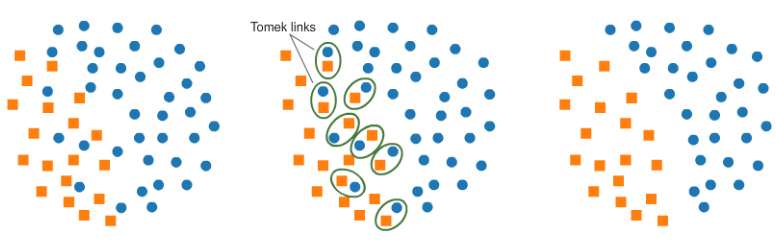

#### Over-sampling : SMOTE

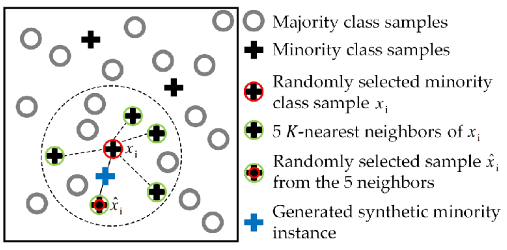

#### SMOTE_Tomek Links

이 방법은 소수 클래스에 대한 합성 데이터를 생성하는 SMOTE 기능과 다수 클래스에서 Tomek 링크로 식별되는 데이터를 제거하는 Tomek links를 결합

1. SMOTE로 소수 클래스에서 가상의 합성 데이터 생성 (소수 클래스가 원하는 비율로 될 때까지)
2. Tomek-Links를 만들고 다수 클래스를 제거 

https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [54]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [57]:
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import *

### 1. Raw Data

In [59]:
df = pd.read_excel('C:/Users/dbssk6904/Desktop/Morphea/all.xlsx', header=0)

X = df.drop(['cls', 'number'], axis=1)
y = df['cls']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(126, 39) (55, 39) (126,) (55,)


#### 1-1. Scaling
-Tree 모델은 scaling 필수 아님 (시각화 위해 진행)

In [61]:
continuous_feat = ['age', 'Duration of disease']

contin_train = X_train[continuous_feat]
contin_test = X_test[continuous_feat]

In [62]:
scaler = StandardScaler()
fitted_scaler = scaler.fit(contin_train)

scaled_train = fitted_scaler.fit_transform(contin_train)
scaled_train = pd.DataFrame(scaled_train, columns=['scaled_'+feat for feat in continuous_feat])

scaled_test = fitted_scaler.fit_transform(contin_test)
scaled_test = pd.DataFrame(scaled_test, columns=['scaled_'+feat for feat in continuous_feat])

In [63]:
scaled_X_train = pd.concat([X_train.reset_index(drop=True), scaled_train], axis=1)
scaled_X_train = scaled_X_train.drop(continuous_feat, axis=1)

In [64]:
scaled_X_test = pd.concat([X_test.reset_index(drop=True), scaled_test], axis=1)
scaled_X_test = scaled_X_test.drop(continuous_feat, axis=1)

#### 1-2. Data Visualization

##### -2차원 축소

In [65]:
tsne = TSNE(n_components=2, random_state=42).fit_transform(scaled_X_train)

tsne_result = pd.DataFrame(tsne, columns=['value0', 'value1'])

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


In [66]:
tsne_result['cls'] = y_train.reset_index(drop=True)

tsne_result_0 = tsne_result[tsne_result['cls']==0]
tsne_result_1 = tsne_result[tsne_result['cls']==1]
tsne_result_2 = tsne_result[tsne_result['cls']==2]

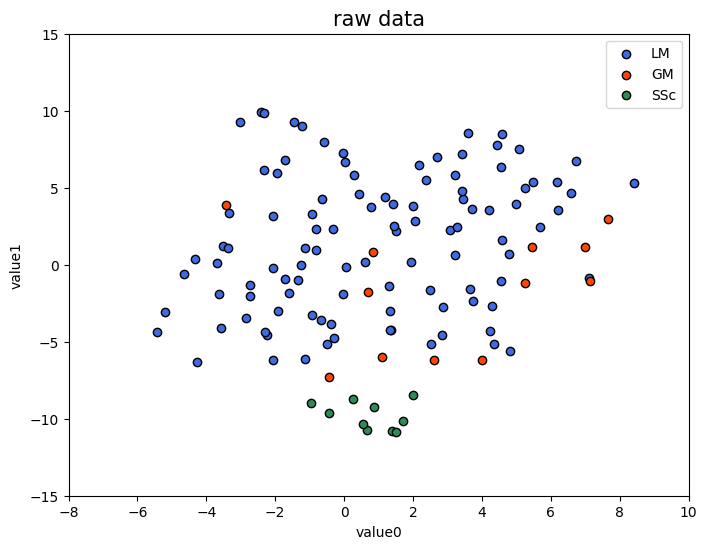

In [67]:
plt.figure(figsize=(8,6))

plt.scatter(tsne_result_0['value0'], tsne_result_0['value1'], color='royalblue', label='LM', edgecolors='black')
plt.scatter(tsne_result_1['value0'], tsne_result_1['value1'], color='orangered', label='GM', edgecolors='black')
plt.scatter(tsne_result_2['value0'], tsne_result_2['value1'], color='seagreen', label='SSc', edgecolors='black')

plt.xlabel('value0')
plt.ylabel('value1')
plt.xlim([-8, 10])
plt.ylim([-15, 15])

plt.legend()
plt.title('raw data', fontsize=15)
plt.show
plt.savefig('./raw_data')

##### -3차원 축소

In [16]:
tsne = TSNE(n_components=3, random_state=42).fit_transform(scaled_X_train)

tsne_result = pd.DataFrame(tsne, columns=['value0', 'value1', 'value2'])

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


In [17]:
tsne_result['cls'] = y_train.reset_index(drop=True)

tsne_result_0 = tsne_result[tsne_result['cls']==0]
tsne_result_1 = tsne_result[tsne_result['cls']==1]
tsne_result_2 = tsne_result[tsne_result['cls']==2]

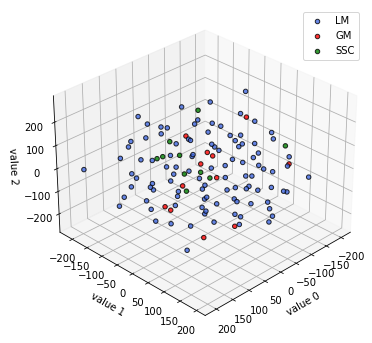

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_result_0['value0'], tsne_result_0['value1'], tsne_result_0['value2'], color = 'royalblue', label = 'LM', edgecolors='black', alpha=0.8)
ax.scatter(tsne_result_1['value0'], tsne_result_1['value1'], tsne_result_1['value2'], color = 'red', label = 'GM', edgecolors='black', alpha=0.8)
ax.scatter(tsne_result_2['value0'], tsne_result_2['value1'], tsne_result_2['value2'], color = 'green', label = 'SSC', edgecolors='black', alpha=0.8)

ax.view_init(30, 45)
ax.set_xlabel('value 0')
ax.set_ylabel('value 1')
ax.set_zlabel('value 2')
ax.legend()
plt.show()

### 2. Over-sampled Data

#### * SMOTE-Tomek

In [26]:
df = pd.read_excel('C:/Users/dbssk6904/Desktop/Morphea/all.xlsx', header=0)

X = df.drop(['cls', 'number'], axis=1)
y = df['cls']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, '\n')
print('y_train :', Counter(y_train))
print('y_test :', Counter(y_test))

(126, 39) (55, 39) (126,) (55,) 

y_train : Counter({0: 104, 1: 12, 2: 10})
y_test : Counter({0: 46, 2: 5, 1: 4})


In [48]:
resample = SMOTETomek(smote=SMOTE(k_neighbors=6, random_state=42), 
                      tomek=TomekLinks(sampling_strategy='majority'), 
                      random_state=42) 
X_train_res, y_train_res = resample.fit_resample(X_train, y_train)

print(X_train_res.shape, y_train_res.shape)
print(Counter(y_train_res))

(302, 39) (302,)
Counter({1: 104, 2: 104, 0: 94})


#### 2-1. scaling

In [49]:
def scaling(fit_df, transform_df, scaler, continuous_feat):
    contin_fit = fit_df[continuous_feat]
    contin_tr = transform_df[continuous_feat]
    
    fitted_scaler = scaler.fit(contin_fit)
    
    scaled_tr = fitted_scaler.fit_transform(contin_tr)
    scaled_tr = pd.DataFrame(scaled_tr, columns=['scaled_'+feat for feat in continuous_feat])
    
    scaled_df = pd.concat([transform_df.reset_index(drop=True), scaled_tr], axis=1)
    scaled_df = scaled_df.drop(continuous_feat, axis=1)
    
    return scaled_df

In [50]:
scaler = StandardScaler()
continuous_feat = ['age', 'Duration of disease']

scaled_X_train_res = scaling(X_train_res, X_train_res, scaler, continuous_feat)

#### 2-2. Data Visualization

##### - 2차원 축소 

In [51]:
tsne = TSNE(n_components=2, random_state=42).fit_transform(scaled_X_train_res)

tsne_result = pd.DataFrame(tsne, columns=['value0', 'value1'])

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


In [52]:
tsne_result['cls'] = y_train_res

tsne_result_0 = tsne_result[tsne_result['cls']==0]
tsne_result_1 = tsne_result[tsne_result['cls']==1]
tsne_result_2 = tsne_result[tsne_result['cls']==2]

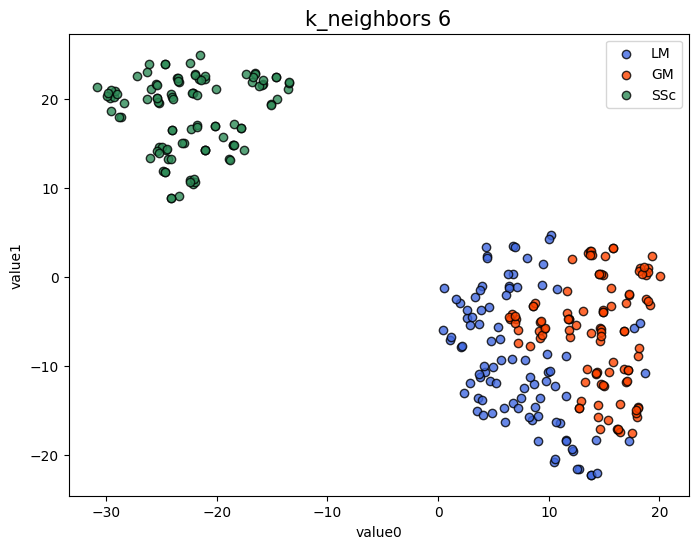

In [53]:
plt.figure(figsize=(8,6))

plt.scatter(tsne_result_0['value0'], tsne_result_0['value1'], color='royalblue', label='LM', edgecolors='black', alpha=0.8)
plt.scatter(tsne_result_1['value0'], tsne_result_1['value1'], color='orangered', label='GM', edgecolors='black', alpha=0.8)
plt.scatter(tsne_result_2['value0'], tsne_result_2['value1'], color='seagreen', label='SSc', edgecolors='black', alpha=0.8)

plt.xlabel('value0')
plt.ylabel('value1')

plt.legend()
plt.title('k_neighbors 6', fontsize=15)

plt.show
plt.savefig('./SMOTomek_neighbor_6.png')

##### - 3차원 축소

In [50]:
tsne = TSNE(n_components=3, random_state=42).fit_transform(scaled_X_train_res)

tsne_result = pd.DataFrame(tsne, columns=['value0', 'value1', 'value2'])

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


In [51]:
tsne_result['cls'] = y_train_res

tsne_result_0 = tsne_result[tsne_result['cls']==0]
tsne_result_1 = tsne_result[tsne_result['cls']==1]
tsne_result_2 = tsne_result[tsne_result['cls']==2]

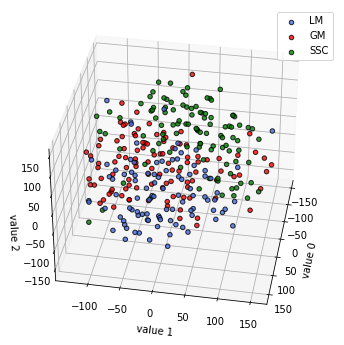

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_result_0['value0'], tsne_result_0['value1'], tsne_result_0['value2'], color = 'royalblue', label = 'LM', edgecolors='black', alpha=0.8)
ax.scatter(tsne_result_1['value0'], tsne_result_1['value1'], tsne_result_1['value2'], color = 'red', label = 'GM', edgecolors='black', alpha=0.8)
ax.scatter(tsne_result_2['value0'], tsne_result_2['value1'], tsne_result_2['value2'], color = 'green', label = 'SSC', edgecolors='black', alpha=0.8)

ax.view_init(35, 10)
ax.set_xlabel('value 0')
ax.set_ylabel('value 1')
ax.set_zlabel('value 2')
ax.legend()
plt.show()

### * SMOTE-ENN

-ENN은 다수 클래스 중, 가장 가까운 k개(n_neighbors)의 데이터가 모두(kind_sel='all') 또는 다수(kind_sel='mode')가 다수 클래스가 아니면 삭제하는 방법

-소수 클래스 주변의 다수 클래스 데이터 제거, Tomek과 비슷한 다운 샘플링


In [449]:
# Load data

df = pd.read_excel('C:/Users/dbssk6904/Desktop/Morphea/training.xlsx', header=0)

X = df.drop(['cls', 'number'], axis=1)
y = df['cls']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, '\n')
print('y_train :', Counter(y_train))
print('y_test :', Counter(y_test))

(126, 40) (55, 40) (126,) (55,) 

y_train : Counter({0: 104, 1: 12, 2: 10})
y_test : Counter({0: 46, 2: 5, 1: 4})


In [450]:
# Sampling

resample = SMOTEENN(smote=SMOTE(k_neighbors=5, random_state=42), 
                      enn=EditedNearestNeighbours(sampling_strategy='majority', 
                                                  n_neighbors=3,
                                                  kind_sel='mode'),   # default ENN(n_neighbors=3, kind_sel='all')
                      random_state=42) 
X_train_res, y_train_res = resample.fit_resample(X_train, y_train)

print(X_train_res.shape, y_train_res.shape)
print(Counter(y_train_res))

(275, 40) (275,)
Counter({1: 104, 2: 104, 0: 67})


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [451]:
# Scaling

scaler = StandardScaler()
continuous_feat = ['age', 'Duration of disease']

scaled_X_train_res = scaling(X_train_res, X_train_res, scaler, continuous_feat)

In [452]:
# TSNE

tsne = TSNE(n_components=2, random_state=42).fit_transform(scaled_X_train_res)

tsne_result = pd.DataFrame(tsne, columns=['value0', 'value1'])

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


In [453]:
tsne_result['cls'] = y_train_res

tsne_result_0 = tsne_result[tsne_result['cls']==0]
tsne_result_1 = tsne_result[tsne_result['cls']==1]
tsne_result_2 = tsne_result[tsne_result['cls']==2]

<function matplotlib.pyplot.show(close=None, block=None)>

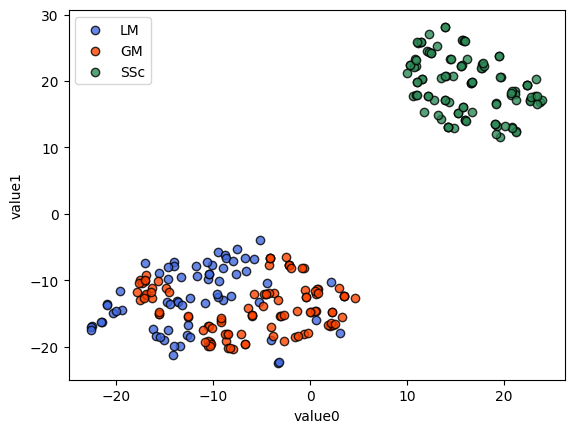

In [454]:
plt.scatter(tsne_result_0['value0'], tsne_result_0['value1'], color='royalblue', label='LM', edgecolors='black', alpha=0.8)
plt.scatter(tsne_result_1['value0'], tsne_result_1['value1'], color='orangered', label='GM', edgecolors='black', alpha=0.8)
plt.scatter(tsne_result_2['value0'], tsne_result_2['value1'], color='seagreen', label='SSc', edgecolors='black', alpha=0.8)

plt.xlabel('value0')
plt.ylabel('value1')
plt.legend()
plt.show

#plt.savefig('./SMOTENN_neighbor_3.png')